In [1]:
from hw2 import Uniform,Exponential,Xnorgenerator,Normal
from scipy.stats import chisquare,kstest
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("ggplot")
SAMPLES = 50000
BINS = 100
KS_SAMPLES = 1000

In [5]:
uniform_xor = Uniform()
uniform_xor.switch_rng(Xnorgenerator())
uniform_lcg = Uniform()
uni_rvs_xor = uniform_xor.rvs(SAMPLES)
uni_rvs_lcg = uniform_lcg.rvs(SAMPLES)

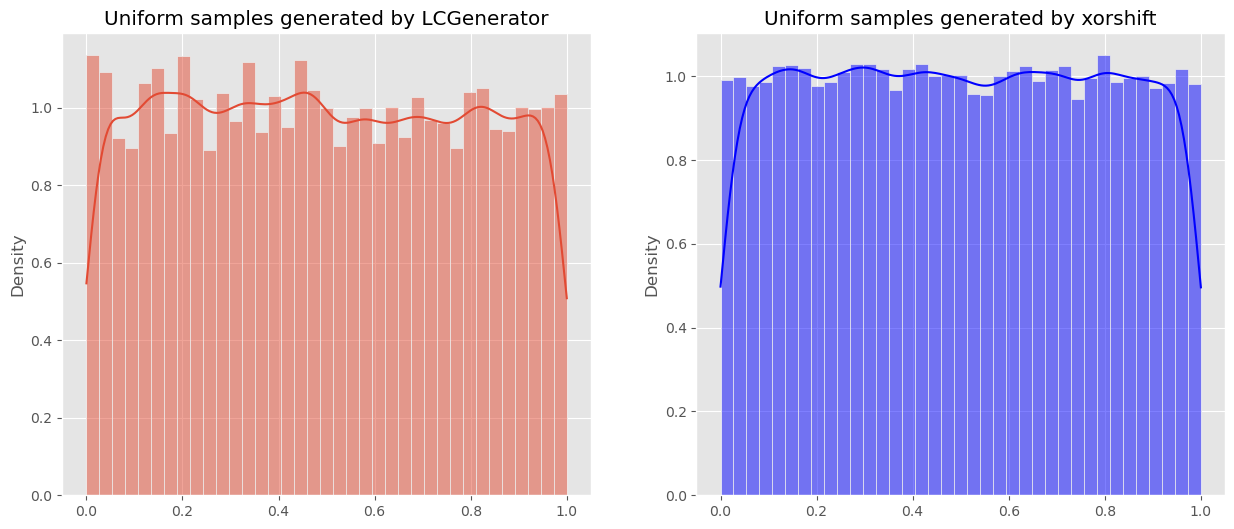

In [8]:
fig,axs = plt.subplots(ncols=2,figsize=(15,6))
sns.histplot(uni_rvs_xor,kde=True,stat='density',ax=axs[1],color="blue")
sns.histplot(uni_rvs_lcg,kde=True,stat='density',ax=axs[0])
axs[0].set_title("Uniform samples generated by LCGenerator")
axs[1].set_title("Uniform samples generated by xorshift")
plt.show()

Power_divergenceResult(statistic=0.0017069600000000009, pvalue=1.0)

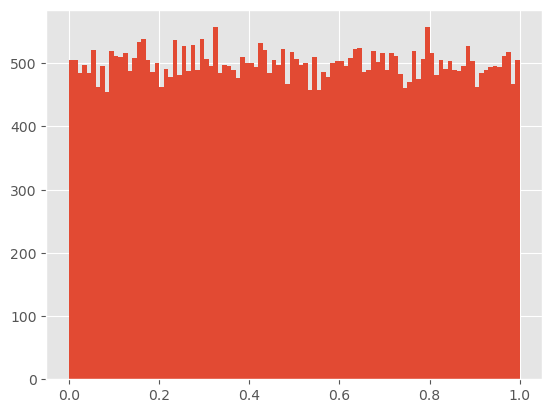

In [13]:
counts = plt.hist(uni_rvs_xor,bins=BINS)[0]
total_freq = np.sum(counts)
obs_freq = counts/total_freq
exp_freq = 1 / BINS * np.ones(obs_freq.shape)
chisquare(obs_freq,exp_freq)

Power_divergenceResult(statistic=0.011976559999999999, pvalue=1.0)

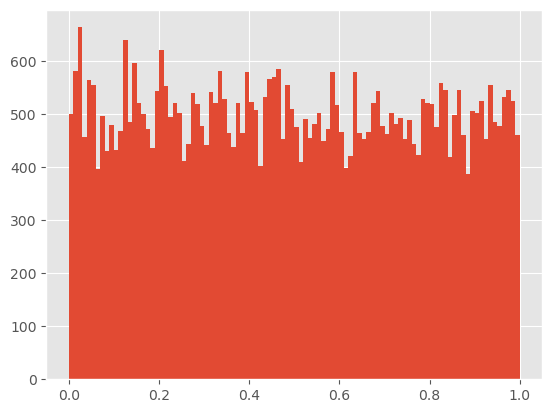

In [12]:
counts = plt.hist(uni_rvs_lcg,bins=BINS)[0]
total_freq = np.sum(counts)
obs_freq = counts/total_freq
exp_freq = 1 / BINS * np.ones(obs_freq.shape)
chisquare(obs_freq,exp_freq)

In [14]:
kstest(uni_rvs_xor,stats.uniform.cdf)

KstestResult(statistic=0.0028109124131037166, pvalue=0.8233031426187576, statistic_location=0.4641890875868963, statistic_sign=1)

In [15]:
kstest(uni_rvs_lcg,stats.uniform.cdf)

KstestResult(statistic=0.012864792633056621, pvalue=1.2863924265768834e-07, statistic_location=0.5024352073669434, statistic_sign=1)

In [21]:
from hw2 import ks_distance
cdf = stats.uniform.cdf(x=np.linspace(0,1,num=KS_SAMPLES))
diffs2 = []
for i in range(KS_SAMPLES):
    diffs2.append(ks_distance(uniform_xor.rvs(KS_SAMPLES), cdf))

In [22]:
cdf = stats.uniform.cdf(x=np.linspace(0,1,num=KS_SAMPLES))
diffs1 = []
for i in range(KS_SAMPLES):
    diffs1.append(ks_distance(uniform_lcg.rvs(KS_SAMPLES), cdf))

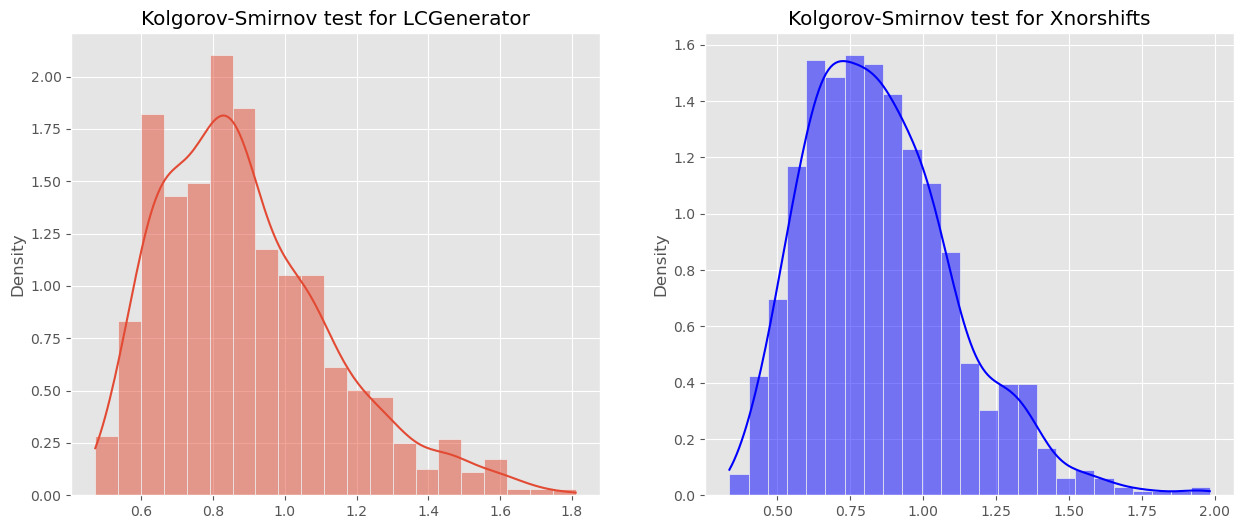

In [24]:
fig,axs = plt.subplots(ncols=2,figsize=(15,6))
sns.histplot(diffs1,kde=True,stat='density',ax=axs[0])
sns.histplot(diffs2,kde=True,stat='density',ax=axs[1],color='blue')
axs[0].set_title('Kolgorov-Smirnov test for LCGenerator')
axs[1].set_title('Kolgorov-Smirnov test for Xnorshifts')
plt.show()


In [29]:
exp_lcg = Exponential()
exp_xor = Exponential()
exp_xor.switch_rng(Xnorgenerator())
exp_std = stats.expon()

exp_rvs_lcg = exp_lcg.rvs(SAMPLES)
exp_rvs_xor = exp_xor.rvs(SAMPLES)
exp_rvs_std = exp_std.rvs(SAMPLES)

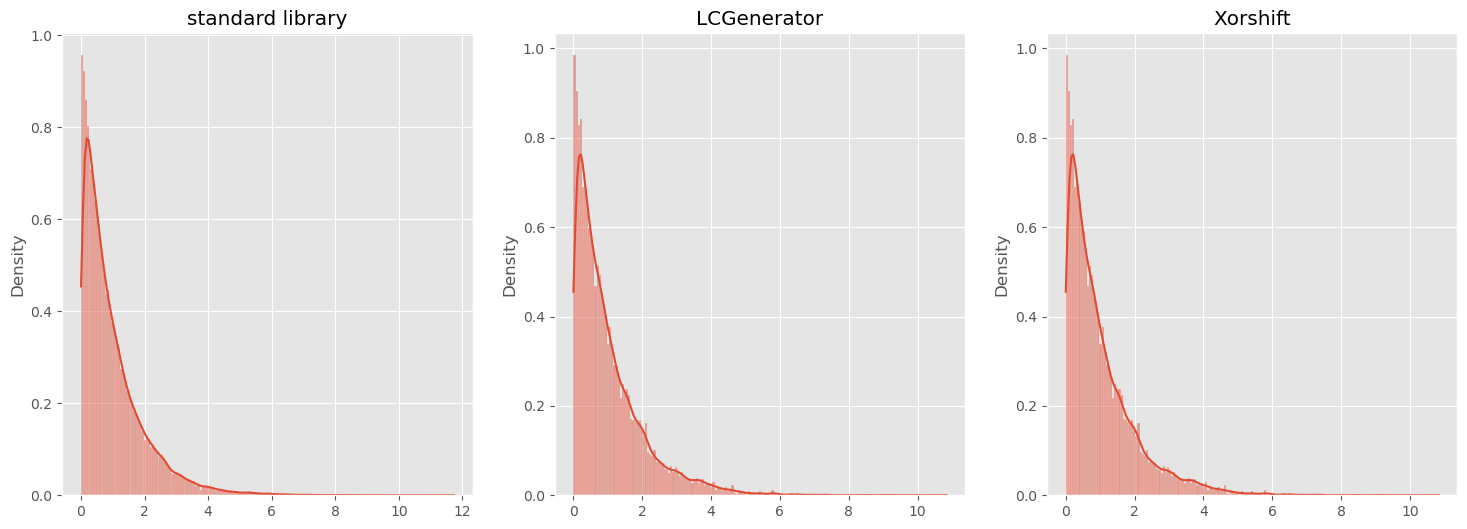

In [30]:
fig,axs = plt.subplots(ncols=3,figsize=(18,6))
sns.histplot(exp_rvs_std,kde=True,stat='density',ax=axs[0])
sns.histplot(exp_rvs_lcg,kde=True,stat='density',ax=axs[1])
sns.histplot(exp_rvs_xor,kde=True,stat='density',ax=axs[2])
axs[0].set_title('standard library')
axs[1].set_title('LCGenerator')
axs[2].set_title('Xorshift')
plt.show()

In [11]:
uniform_lcg = Uniform()
uni_rvs_lcg = uniform_lcg.rvs(SAMPLES)

/home/qin/miniconda3/envs/numerical/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

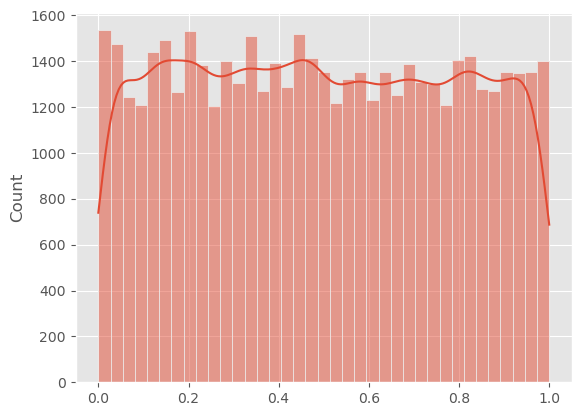

In [12]:
sns.histplot(uni_rvs_lcg,kde=True)

Power_divergenceResult(statistic=0.0017069600000000009, pvalue=1.0)

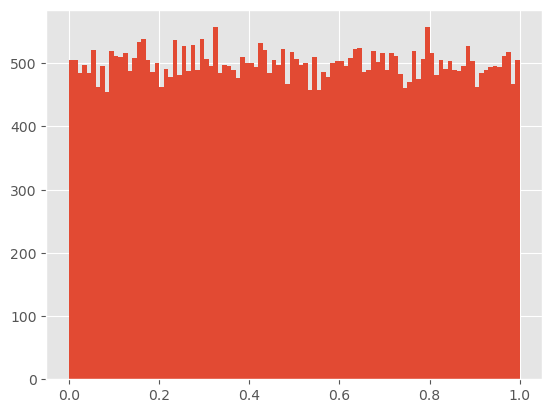

In [13]:
counts = plt.hist(uni_rvs_xor,bins=BINS)[0]
total_freq = np.sum(counts)
obs_freq = counts/total_freq
exp_freq = 1 / BINS * np.ones(obs_freq.shape)
chisquare(obs_freq,exp_freq)

In [2]:
normal = Normal(mean=np.zeros(2),cov=np.array([[5,2],[2,1]]))

In [61]:
normal.rvs()

array([-0.13080264,  0.49467985])

In [87]:
normal = stats.multivariate_normal(mean=np.zeros(2),cov=np.array([[5,2],[2,1]]))

In [88]:
samples = np.array([normal.rvs() for _ in range(100000)])

In [89]:
norm = np.sqrt(samples[:,0] ** 2 + samples[:,1] ** 2)
norm = np.expand_dims(norm, axis=1)
angles = samples / norm
angles = np.arctan2(angles[:,1],angles[:,0])
angles

array([ 0.44755444,  0.51395931, -2.98282843, ..., -2.70825674,
        0.24542465,  2.75532062])

<Axes: ylabel='Count'>

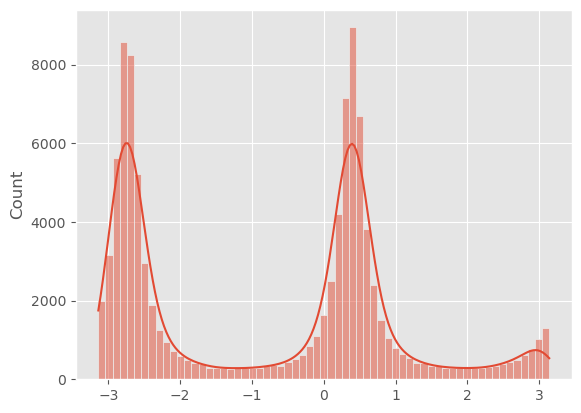

In [91]:
sns.histplot(angles,binwidth=0.1,kde=True)

In [8]:
u1 = uniform_xor.rvs(100)
u2 = uniform_xor.rvs(100)
u1

array([0.82444022, 0.37821106, 0.75498682, 0.18510406, 0.60448915,
       0.54876452, 0.42621194, 0.59110454, 0.65575941, 0.13817145,
       0.27090843, 0.06752288, 0.62752006, 0.475983  , 0.1858623 ,
       0.55044913, 0.24649806, 0.92750391, 0.46992   , 0.36030219,
       0.82753143, 0.45797078, 0.64717647, 0.14465129, 0.86541581,
       0.41665178, 0.53763092, 0.45054647, 0.93466382, 0.73385189,
       0.09862851, 0.86483896, 0.98046661, 0.68048075, 0.28110979,
       0.60828312, 0.24242836, 0.45222892, 0.9453725 , 0.13134879,
       0.84244748, 0.12417672, 0.18839912, 0.55773225, 0.77826045,
       0.25020324, 0.81058206, 0.09692192, 0.19305578, 0.22676654,
       0.97452393, 0.11845383, 0.02764835, 0.82832042, 0.06256274,
       0.80965819, 0.08712219, 0.4258091 , 0.31057643, 0.78038561,
       0.58282045, 0.48925105, 0.99177476, 0.42589055, 0.35671619,
       0.86637487, 0.12626249, 0.63480503, 0.04819778, 0.82234625,
       0.25912107, 0.82257631, 0.70222409, 0.30588106, 0.61743

In [9]:
u2

array([0.69167009, 0.84122597, 0.04916263, 0.81073486, 0.70391538,
       0.46949686, 0.10221912, 0.1594409 , 0.6239062 , 0.33825469,
       0.54908009, 0.48818673, 0.36772199, 0.23488019, 0.07034842,
       0.84851433, 0.04662575, 0.73945862, 0.0068085 , 0.21089357,
       0.70650119, 0.14395039, 0.26557231, 0.21392368, 0.39518446,
       0.58032786, 0.38445845, 0.13659853, 0.09447752, 0.89637292,
       0.57694978, 0.9337927 , 0.5250086 , 0.58123679, 0.88624932,
       0.02695655, 0.08292977, 0.30954028, 0.59962157, 0.70897112,
       0.10504383, 0.34551264, 0.55779047, 0.51570202, 0.15863644,
       0.77505773, 0.72650964, 0.46872999, 0.77687342, 0.56281478,
       0.0108616 , 0.4219823 , 0.40443188, 0.31262647, 0.47851754,
       0.67026789, 0.91467131, 0.96463676, 0.30977993, 0.37104595,
       0.93999761, 0.2056935 , 0.04949967, 0.01402722, 0.02677367,
       0.28127737, 0.58756737, 0.23682255, 0.73808254, 0.25108324,
       0.40538282, 0.59616397, 0.78292661, 0.42952686, 0.54011

In [7]:
np.linalg.cholesky(np.identity(2)) @(2 * np.ones(2))

array([2., 2.])